### Naƒçteme pot≈ôebn√© knihovny

In [31]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

### a) Konjugovan√© apriorn√≠ a aposteriorn√≠ rozdƒõlen√≠, prediktivn√≠ rozdƒõlen√≠

In [32]:
# Naƒçteme data do pandas dataframe
df = pd.read_excel('Projekt-2_Data.xlsx', nrows=100)

# Ulo≈æ√≠me pouze sloupec s hodnotami z prvn√≠ √∫lohy
uloha_1_column = df['uloha_1 a)']

# Zobraz√≠me hodnoty 
uloha_1_column

0     2
1     2
2     1
3     3
4     0
     ..
95    3
96    0
97    3
98    1
99    1
Name: uloha_1 a), Length: 100, dtype: int64

### K√≥d pro √∫lohu 1a) 1+3

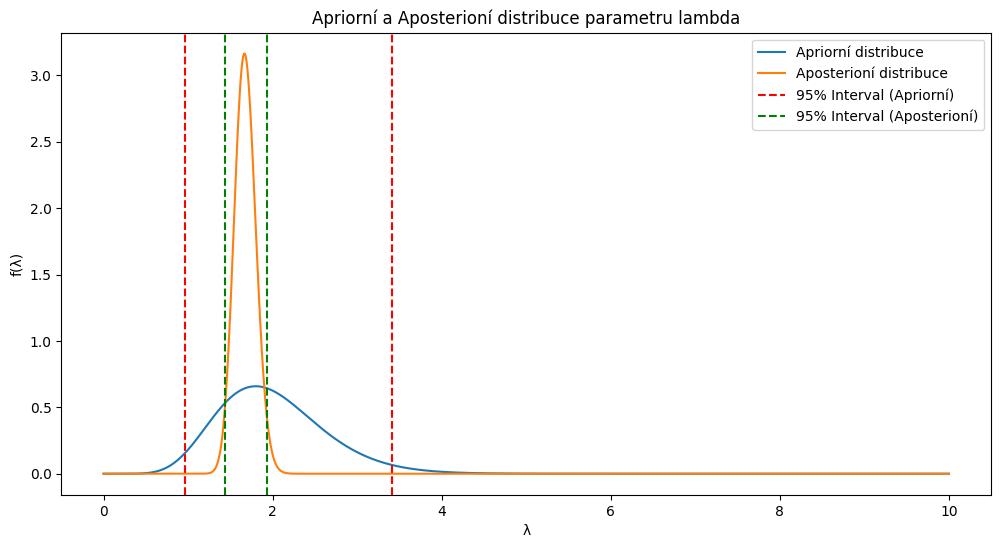

In [33]:
# Poissonovo rozdƒõlen√≠ Alpha v√Ωskyt≈Ø v Beta intervalech podle https://en.wikipedia.org/wiki/Conjugate_prior
alpha_prior = 10

beta_prior = 5

# Poisson -> Gamma rozdƒõlen√≠
prior_distribution = stats.gamma(alpha_prior, scale=1/beta_prior)


# Bayesovsk√Ω v√Ωpoƒçet - Aposterion√≠ distribuce
alpha_posterior = alpha_prior + uloha_1_column.sum() # a' = a + sum(x_i)
beta_posterior = beta_prior + len(uloha_1_column) # b' = b + n  | n = poƒçet pozorov√°n√≠
posterior_distribution = stats.gamma(alpha_posterior, scale=1/beta_posterior)

# V√Ωpoƒçet kvantil≈Ø pro interval spolehlivosti 
# V√ùPOƒåET HODNOT PRO √öKOL 3
lower_bound_prior, upper_bound_prior = stats.gamma.interval(0.95, alpha_prior, scale=1/beta_prior)
lower_bound_posterior, upper_bound_posterior = stats.gamma.interval(0.95, alpha_posterior, scale=1/beta_posterior)


# Vykreslen√≠ v√Ωsledk≈Ø
x_values = np.linspace(0, 10, 1000)

# Apriorn√≠ a aposteriorn√≠ distribuce parametru lambda
plt.figure(figsize=(12, 6))
plt.plot(x_values, prior_distribution.pdf(x_values), label='Apriorn√≠ distribuce')
plt.plot(x_values, posterior_distribution.pdf(x_values), label='Aposterion√≠ distribuce')
plt.axvline(lower_bound_prior, linestyle='--', color='red', label='95% Interval (Apriorn√≠)')
plt.axvline(upper_bound_prior, linestyle='--', color='red')
plt.axvline(lower_bound_posterior, linestyle='--', color='green', label='95% Interval (Aposterion√≠)')
plt.axvline(upper_bound_posterior, linestyle='--', color='green')
plt.title('Apriorn√≠ a Aposterion√≠ distribuce parametru lambda')
plt.xlabel('Œª')
plt.ylabel('f(Œª)')
plt.legend()
plt.show()


### K√≥d pro √∫lohu 1a) 2

5


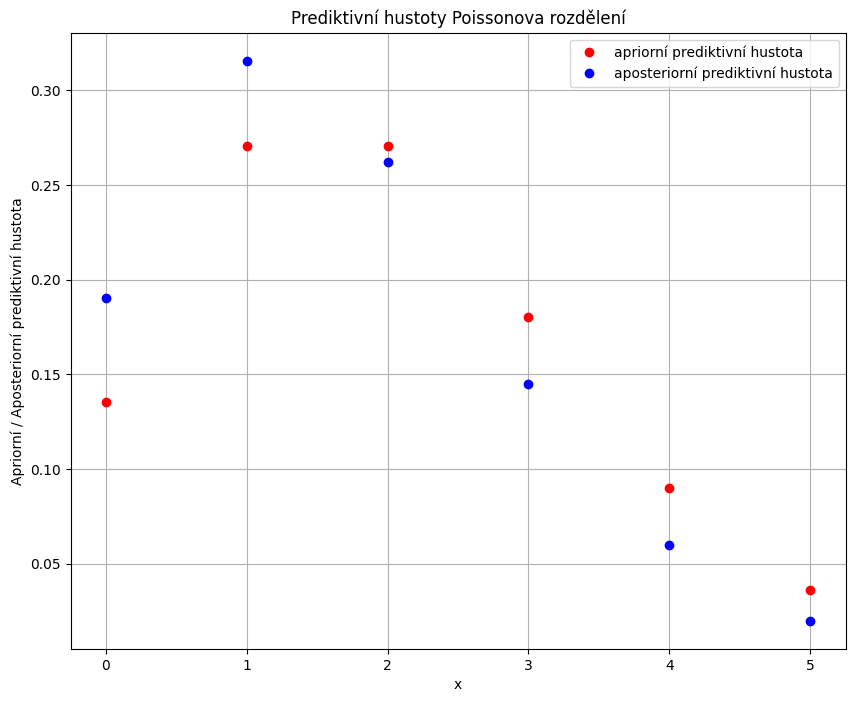

In [61]:
# Odhad p≈ôipojen√≠ podle zad√°n√≠ 10 p≈ôipojen√≠ za 5 ms
lambda_expert = 10 / 5

x_values = uloha_1_column.values

# Spoƒç√≠t√°me apriorn√≠ prediktivn√≠ hustotu pro v≈°echny mo≈æn√© hodnoty x
# funkce pmf zm√≠nƒõna na wikipedii https://en.wikipedia.org/wiki/Conjugate_prior
x_range = np.arange(0, max(x_values) + 1)
apriori_pmf = stats.poisson.pmf(x_range, lambda_expert)

# Spoƒç√≠t√°me aposteriori prediktivn√≠ hustotu pro v≈°echny mo≈æn√© hodnoty x
lambda_observed = np.mean(x_values)
aposteriori_pmf = stats.poisson.pmf(x_range, lambda_observed)

# Hodnoty zobraz√≠me pomoc√≠ grafu
plt.figure(figsize=(10, 8))
plt.plot(x_range, apriori_pmf, 'o', label='apriorn√≠ prediktivn√≠ hustota', color='red')
plt.plot(x_range, aposteriori_pmf, 'o', label='aposteriorn√≠ prediktivn√≠ hustota', color='blue')
plt.xlabel('x')
plt.ylabel('Apriorn√≠ / Aposteriorn√≠ prediktivn√≠ hustota')
plt.title('Prediktivn√≠ hustoty Poissonova rozdƒõlen√≠')
plt.legend()
plt.grid(True)
plt.show()

### K√≥d pro √∫lohu 1a) 3 + 4 + 5

In [35]:
# Zobrazen√≠ v√Ωsledk≈Ø intervalu spolehlivosti
print(f"95% Interval spolehlivosti (Apriorn√≠): ({lower_bound_prior}, {upper_bound_prior})")
print(f"95% Interval spolehlivosti (Aposterion√≠): ({lower_bound_posterior}, {upper_bound_posterior})\n")

# V√Ωbƒõr dvou aposteriorn√≠ch bodov√Ωch odhad≈Ø parametru ùúÜ
# Bodov√Ω odhad pr≈Ømƒõrn√© hodnoty, odpov√≠d√° st≈ôedn√≠ hodnotƒõ
# Jedn√° se o z√°kladn√≠ odhady, kter√© nejl√©pe popisuj√≠ data
mean_posterior = alpha_posterior / beta_posterior
# Bodo√Ω odhad medi√°nu
median_posterior = (alpha_posterior - 1/3) / beta_posterior

print("Aposterion√≠ bodov√© odhady parametru ùúÜ:")
print(f"St≈ôedn√≠ hodnota: {mean_posterior}")
print(f"Medi√°n: {median_posterior}")

# Bodov√© odhady poƒçtu pozorovan√≠
# Opƒõt se jedn√° o z√°kladn√≠ odhady, kter√© nejl√©pe popisuj√≠ data
# Apriorn√≠ bodov√Ω odhad pr≈Ømƒõrn√© hodnoty
mean_prior_observed = alpha_prior / beta_prior
# Aposterion√≠ bodov√Ω odhad pr≈Ømƒõrn√© hodnoty
mean_posterior_observed = alpha_posterior / beta_posterior

print("\nApriorn√≠ a aposterion√≠ bodov√© odhady poƒçtu pozorovan√≠:")
print(f"Apriorn√≠ st≈ôedn√≠ hodnota: {mean_prior_observed}")
print(f"Aposterion√≠ st≈ôedn√≠ hodnota: {mean_posterior_observed}")

95% Interval spolehlivosti (Apriorn√≠): (0.9590777392264868, 3.416960690283833)
95% Interval spolehlivosti (Aposterion√≠): (1.4376938284869922, 1.9327207471868797)

Aposterion√≠ bodov√© odhady parametru ùúÜ:
St≈ôedn√≠ hodnota: 1.6761904761904762
Medi√°n: 1.6730158730158728

Apriorn√≠ a aposterion√≠ bodov√© odhady poƒçtu pozorovan√≠:
Apriorn√≠ st≈ôedn√≠ hodnota: 2.0
Aposterion√≠ st≈ôedn√≠ hodnota: 1.6761904761904762


### b) Aproximace diskr√©tn√≠m rozdƒõlen√≠m

### K√≥d pro √∫lohu 1b) 1

### Vƒõrohodnostn√≠ funkce

In [36]:
# Naƒçteme data do pandas dataframe
df = pd.read_excel('Projekt-2_Data.xlsx')

# Hodnoty ze zad√°n√≠
mean_value = 3 # ùúá
std_value = 1 # ùúé^2 
a_value = 1 # a

# Spoƒç√≠t√°me kumulativn√≠ distribuƒçn√≠ funkci podle odkazu 
# https://en.wikipedia.org/wiki/Truncated_normal_distribution
# Odpov√≠d√° jmenovateli ve vzorci f(x, ùúá, ùúé, a, b) = (1/ùúé) * ((normal distribution)/((cumulative distribution(b) - (cumulative distribution(a))))
def calculate_cdf(b, mean, std):
    return stats.norm.cdf(b, loc=mean, scale=std) - stats.norm.cdf(a_value, loc=mean, scale=std)
# Spoƒç√≠t√°me standardn√≠ norm√°ln√≠ distribuci, opƒõt podle odkazu # https://en.wikipedia.org/wiki/Truncated_normal_distribution
# Odpov√≠d√° ƒçitateli ve vzorci f(x, ùúá, ùúé, a, b) = (1/ùúé) * ((normal distribution)/((cumulative distribution(b) - (cumulative distribution(a))))
def normal_dist(x , mean , sd):
    prob_density = (1/(np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

# V ka≈æd√© skupinƒõ (10 000 skupin) najdeme index ≈ô√°dku s nejvy≈°≈°√≠ hodnotou
max_indices = df.groupby('skupina')['uloha_1 b)_prior'].idxmax()


# Vytvo≈ô√≠me nov√Ω dataframe, kter√Ω obsahuje pouze ≈ô√°dky s nejvy≈°≈°√≠ hodnotou
result_df = df.loc[max_indices]

# Rozdƒõl√≠me n√°mi zvolen√Ωch 10 000 hodnot na 50 hodnot, neboli 50 r≈Øzn√Ωch parametr≈Ø 'b'
b = np.linspace(min(result_df["uloha_1 b)_prior"]), max(result_df["uloha_1 b)_prior"]), 50)

# Z√≠sk√°me data ze sloupce 'uloha_1 b)_pozorov√°n√≠' a ignorujeme NaN hodnoty
observed_data = df['uloha_1 b)_pozorov√°n√≠'].head(100)

# Filtrujeme hodnoty 'b' podle vzorce z odkazu https://en.wikipedia.org/wiki/Truncated_normal_distribution
# V√Ωsledkem je seznam hodnot 'b', kter√© jsou jsou vƒõt≈°√≠, ne≈æ v≈°echny hodnoty pozorov√°n√≠
filtered_b = [value for value in b if all(a_value < i < value for i in observed_data)]

prob_density = []

# Projdeme n√°mi zvolen√© hodnoty 'b' a vypoƒç√≠t√°me pro ka≈æd√© z nich pravdƒõpodobnostn√≠ hustotu
for value in filtered_b:
    # Spoƒç√≠t√°me jmenovatel
    denominator = calculate_cdf(value, mean_value, std_value)
    # n√°soben√≠ 1/std_value je zbyteƒçn√©, proto≈æe 1/1 = 1
    sum_prob = 1
    for i in observed_data:
        sum_prob *= (normal_dist(i, mean_value, std_value) / denominator)
    # P≈ôid√°me vypoƒç√≠tanou pravdƒõpodobnostn√≠ hustotu do seznamu
    prob_density.append(sum_prob)
    
# Normujeme pravdƒõpodobnostn√≠ hodnoty tak, aby jejich souƒçet byl roven 1
sum_prob_density = sum(prob_density)
verohodnostni_funkce = [x / sum_prob_density for x in prob_density]

### Apriorn√≠ rozdƒõlen√≠

In [37]:
b = result_df["uloha_1 b)_prior"]

# Rozdƒõl√≠me hodnoty 'b' do 50 interval≈Ø a spoƒç√≠t√°me jejich pravdƒõpodobnostn√≠ hodnoty
probability_values, b = np.histogram(b, bins=50, density=True)

# Normujeme pravdƒõpodobnostn√≠ hodnoty tak, aby jejich souƒçet byl roven 1
bin_widths = np.diff(b)
apriorni_rozdeleni = probability_values * bin_widths
# Opƒõt si do 'b' ulo≈æ√≠me 50 hodnot
b = np.linspace(min(result_df["uloha_1 b)_prior"]), max(result_df["uloha_1 b)_prior"]), 50)

### Aposteriorn√≠ rozdƒõlen√≠

In [38]:
# Zvol√≠me pouze posledn√≠ch 22 hodnot, jeliko≈æ vƒõrohodnostn√≠ funkce obsahuje pouze posledn√≠ch 22 hodnot 'b'
prior_probs = apriorni_rozdeleni[-22:]
# Vƒõrohodnostn√≠ funkce z≈Øst√°v√° stejn√°
density_probs = prob_density

# Reprezentujeme jako vƒõrohodnostn√≠ funkci pro p≈ôehlednost vzorce
likelihood = density_probs

# Bayesova vƒõta
numerator = likelihood * prior_probs
# Normujeme tak, aby souƒçet byl roven 1
aposteriorni_rozdeleni  = numerator / np.sum(numerator)

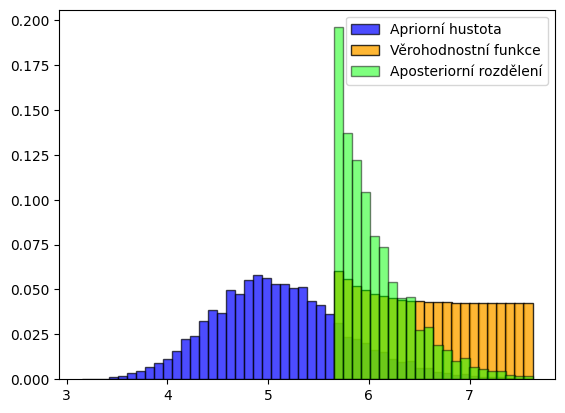

In [39]:
# Vykreslen√≠ v√Ωsledk≈Ø
plt.bar(b, apriorni_rozdeleni, width=bin_widths, color='blue', alpha=0.7, label='Apriorn√≠ hustota', edgecolor='black')
plt.bar(filtered_b, verohodnostni_funkce, width=0.092, color='orange', alpha=0.8, label='Vƒõrohodnostn√≠ funkce', edgecolor='black')
plt.bar(filtered_b, aposteriorni_rozdeleni, width=0.092, color='lime', alpha=0.5, label='Aposteriorn√≠ rozdƒõlen√≠', edgecolor='black')
plt.legend()
plt.show()

### K√≥d k √∫loze 1b) 2

In [40]:
# Spoƒç√≠t√°me kumulativn√≠ distribuƒçn√≠ funkci
cumulative_posterior = np.cumsum(aposteriorni_rozdeleni)

# Spoƒç√≠t√°me spodn√≠ a horn√≠ hranici intervalu spolehlivosti
lower = np.argmax(cumulative_posterior >= 0.025)
upper = np.argmax(cumulative_posterior >= 0.975)

# Najdeme odpov√≠daj√≠c√≠ hodnoty 'b'
lower_bound_posterior = filtered_b[lower]
upper_bound_posterior = filtered_b[upper]

print(f"95% interval spolehlivosti: ({lower_bound_posterior}, {upper_bound_posterior})")

95% interval spolehlivosti: (5.6999748786593525, 7.042014266583222)


In [41]:
# Spoƒç√≠t√°me st≈ôedn√≠ hodnotu a modus
# St≈ôed√≠ hodnota se poƒç√≠t√° jako souƒçin vƒõrohodnostn√≠ funkce a hodnot 'b'
expected_value = np.sum(aposteriorni_rozdeleni * filtered_b)

# Modus je hodnota 'b' s nejvy≈°≈°√≠ pravdƒõpodobnost√≠
modus = np.argmax(aposteriorni_rozdeleni)
# Z√≠sk√°me hodnotu 'b' s nejvy≈°≈°√≠ pravdƒõpodobnost√≠
map_value = filtered_b[modus]

print(f"Odhad st≈ôedn√≠ hodnoty: {expected_value}")
print(f"Odhad modu: {map_value}")

Odhad st≈ôedn√≠ hodnoty: 6.067086994212371
Odhad modu: 5.6999748786593525


### √öloha 2

### K√≥d k √∫loze 2) 1

In [42]:
# Naƒçteme data pro 2. √∫lohu do pandas dataframe
data = pd.read_excel('Projekt-2_Data.xlsx', sheet_name='√öloha 2')

# Pro zjednodu≈°en√≠ z√°pisu p≈ôejmenujeme sloupec 'Ping [ms]' na 'Ping'
data.rename(columns={'Ping [ms]': 'Ping'}, inplace=True)

# P≈ôevedeme kategorickou promƒõnnou na numerickou
data_encoded = pd.get_dummies(data, columns=['OSType'], drop_first=False, dtype=int)

# Spoƒç√≠t√°me koeficienty korelace mezi jednotliv√Ωmi sloupci
corr_matrix = data_encoded.corr().abs()
# Vybereme horn√≠ troj√∫heln√≠kovou matici, proto≈æe je symetrick√°
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Pokud maj√≠ nƒõkter√© sloupce korelaci vƒõt≈°√≠ ne≈æ 0.7, tak je odstran√≠me
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]

# Odstran√≠me sloupce s korelac√≠ vƒõt≈°√≠ ne≈æ 0.7
#data_encoded.drop(columns=to_drop, inplace=True)

# Zap√≠≈°eme pln√Ω model
formula = "Ping ~ ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows + OSType_iOS + np.square(ActiveUsers) + ActiveUsers*InteractingPct + ActiveUsers*OSType_MacOS + ActiveUsers*OSType_Windows + ActiveUsers*OSType_iOS + np.square(InteractingPct) + InteractingPct * OSType_MacOS + InteractingPct * OSType_iOS + InteractingPct * OSType_Windows"

# Vytvo≈ôen√≠ modelu pro rovnici
model = sm.OLS.from_formula(formula, data=data_encoded).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          5.18e-186
Time:                        23:01:05   Log-Likelihood:                -1598.4
No. Observations:                 502   AIC:                             3227.
Df Residuals:                     487   BIC:                             3290.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.3388      2.354     -0.144      0.886      -4.965       4.287
ActiveUsers                       0.0100      0.001     17.571      0.000       0.009       0.011
InteractingPct                   37.6062      4.567      8.234      0.000      28.633      46.580
OSType_MacOS                      2.0017      2.260      0.886      0.376      -2.440       6.443
OSType_Windows                    7.8174      2.217      3.526      0.000       3.461      12.174
OSType_iOS                       -0.0483      2.265     -0.021      0.983      -4.499       4.403
np.square(ActiveUsers)         -4.17e-07    4.4e-08     -9.469      0.000   -5.03e-07    -3.3e-07
ActiveUsers:InteractingPct       -0.0031      0.000     -8.532      0.000      -0.004      -0.002
ActiveUsers:OSType_MacOS          0.0014      0.000      4.536      0.000       0.001       0.002
ActiveUsers:OSType_Windows       -0.0008      0.000     -2.505      0.013      -0.001      -0.000
ActiveUsers:OSType_iOS           -0.0011      0.000     -3.369      0.001      -0.002      -0.000
np.square(InteractingPct)        -3.7258      3.492     -1.067      0.287     -10.587       3.135
InteractingPct:OSType_MacOS      -0.3566      2.530     -0.141      0.888      -5.327       4.614
InteractingPct:OSType_iOS         0.2678      2.691      0.100      0.921      -5.020       5.556
InteractingPct:OSType_Windows     0.4260      2.721      0.157      0.876      -4.919       5.771
==============================================================================
Omnibus:                      228.442   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3152.488
Skew:                           1.603   Prob(JB):                         0.00
Kurtosis:                      14.851   Cond. No.                     1.06e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# Zjist√≠me, kter√© polo≈æka m√° nejvy≈°≈°√≠ p-hodnotu
summary_table = model.summary().tables[1]
p_values = summary_table.data[1:]

# P≈ôevedeme p-hodnoty na float a z√≠sk√°me index nejvy≈°≈°√≠ hodnoty
max_p_value_index = np.argmax([float(row[4]) for row in p_values])

# Z√≠sk√°me n√°zev promƒõnn√© a jej√≠ p-hodnotu
max_p_variable = p_values[max_p_value_index][0]
max_p_value = float(p_values[max_p_value_index][4])

# Zobraz√≠me v√Ωsledky
print(f"The variable with the highest p-value is '{max_p_variable}' with P>|t| = {max_p_value}")

The variable with the highest p-value is 'OSType_iOS' with P>|t| = 0.983


In [44]:
# Pro dal≈°√≠ anal√Ωzu odstran√≠me promƒõnnou s nejvy≈°≈°√≠ p-hodnotou
formula = "Ping ~ ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows + np.square(ActiveUsers) + ActiveUsers*InteractingPct + ActiveUsers*OSType_MacOS + ActiveUsers*OSType_Windows + np.square(InteractingPct) + InteractingPct * OSType_MacOS + InteractingPct * OSType_Windows"

# Vytvo≈ôen√≠ a fitov√°n√≠ modelu
model = sm.OLS.from_formula(formula, data=data_encoded).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     207.2
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          2.50e-176
Time:                        23:01:05   Log-Likelihood:                -1629.7
No. Observations:                 502   AIC:                             3283.
Df Residuals:                     490   BIC:                             3334.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.7098      1.904     -0.373      0.709      -4.450       3.031
ActiveUsers                       0.0095      0.001     17.168      0.000       0.008       0.011
InteractingPct                   37.6383      4.410      8.534      0.000      28.973      46.304
OSType_MacOS                      2.6643      1.976      1.348      0.178      -1.219       6.547
OSType_Windows                    8.4508      1.920      4.402      0.000       4.679      12.223
np.square(ActiveUsers)         -4.16e-07   4.65e-08     -8.954      0.000   -5.07e-07   -3.25e-07
ActiveUsers:InteractingPct       -0.0030      0.000     -7.895      0.000      -0.004      -0.002
ActiveUsers:OSType_MacOS          0.0018      0.000      6.783      0.000       0.001       0.002
ActiveUsers:OSType_Windows       -0.0003      0.000     -1.189      0.235      -0.001       0.000
np.square(InteractingPct)        -3.6170      3.689     -0.980      0.327     -10.866       3.632
InteractingPct:OSType_MacOS      -0.9809      2.215     -0.443      0.658      -5.332       3.371
InteractingPct:OSType_Windows    -0.1942      2.454     -0.079      0.937      -5.015       4.627
==============================================================================
Omnibus:                      181.124   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1868.555
Skew:                           1.261   Prob(JB):                         0.00
Kurtosis:                      12.109   Cond. No.                     9.26e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# D√°le odstran√≠me promƒõnnou s nejvy≈°≈°√≠ p-hodnotou
formula = "Ping ~ ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows + np.square(ActiveUsers) + ActiveUsers*InteractingPct + ActiveUsers*OSType_MacOS + ActiveUsers*OSType_Windows + np.square(InteractingPct) + InteractingPct * OSType_MacOS"

# Vytvo≈ôen√≠ a fitov√°n√≠ modelu
model = sm.OLS.from_formula(formula, data=data_encoded).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     228.4
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.62e-177
Time:                        23:01:05   Log-Likelihood:                -1629.7
No. Observations:                 502   AIC:                             3281.
Df Residuals:                     491   BIC:                             3328.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.6808      1.866     -0.365      0.715      -4.348       2.986
ActiveUsers                     0.0095      0.001     17.187      0.000       0.008       0.011
InteractingPct                 37.5710      4.323      8.691      0.000      29.077      46.065
OSType_MacOS                    2.6361      1.942      1.357      0.175      -1.179       6.451
OSType_Windows                  8.3681      1.609      5.201      0.000       5.207      11.529
np.square(ActiveUsers)      -4.161e-07   4.64e-08     -8.965      0.000   -5.07e-07   -3.25e-07
ActiveUsers:InteractingPct     -0.0030      0.000     -7.903      0.000      -0.004      -0.002
ActiveUsers:OSType_MacOS        0.0018      0.000      6.789      0.000       0.001       0.002
ActiveUsers:OSType_Windows     -0.0003      0.000     -1.201      0.230      -0.001       0.000
np.square(InteractingPct)      -3.6169      3.685     -0.981      0.327     -10.858       3.624
InteractingPct:OSType_MacOS    -0.9169      2.060     -0.445      0.656      -4.964       3.130
==============================================================================
Omnibus:                      181.097   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1868.443
Skew:                           1.261   Prob(JB):                         0.00
Kurtosis:                      12.109   Cond. No.                     9.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# St√°le odstra≈àujeme promƒõnn√© s nejvy≈°≈°√≠ p-hodnotou
formula = "Ping ~ ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows + np.square(ActiveUsers) + ActiveUsers*InteractingPct + ActiveUsers*OSType_MacOS + ActiveUsers*OSType_Windows + np.square(InteractingPct)"

# Vytvo≈ôen√≠ a fitov√°n√≠ modelu
model = sm.OLS.from_formula(formula, data=data_encoded).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     254.1
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.09e-178
Time:                        23:01:05   Log-Likelihood:                -1629.8
No. Observations:                 502   AIC:                             3280.
Df Residuals:                     492   BIC:                             3322.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.5639      1.846     -0.305      0.760      -4.191       3.064
ActiveUsers                    0.0095      0.001     17.209      0.000       0.008       0.011
InteractingPct                37.3293      4.285      8.711      0.000      28.910      45.749
OSType_MacOS                   2.1704      1.635      1.328      0.185      -1.041       5.382
OSType_Windows                 8.3594      1.608      5.200      0.000       5.201      11.518
np.square(ActiveUsers)     -4.164e-07   4.64e-08     -8.980      0.000   -5.08e-07   -3.25e-07
ActiveUsers:InteractingPct    -0.0030      0.000     -7.905      0.000      -0.004      -0.002
ActiveUsers:OSType_MacOS       0.0018      0.000      6.793      0.000       0.001       0.002
ActiveUsers:OSType_Windows    -0.0003      0.000     -1.194      0.233      -0.001       0.000
np.square(InteractingPct)     -3.6743      3.680     -0.998      0.319     -10.905       3.556
==============================================================================
Omnibus:                      182.667   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1916.661
Skew:                           1.270   Prob(JB):                         0.00
Kurtosis:                      12.230   Cond. No.                     9.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# Odstran√≠me dal≈°√≠ promƒõnnou s nejvy≈°≈°√≠ p-hodnotou
formula = "Ping ~ ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows + np.square(ActiveUsers) + ActiveUsers*InteractingPct + ActiveUsers*OSType_MacOS + ActiveUsers*OSType_Windows"

# Vytvo≈ôen√≠ a fitov√°n√≠ modelu
model = sm.OLS.from_formula(formula, data=data_encoded).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     285.8
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.02e-179
Time:                        23:01:05   Log-Likelihood:                -1630.3
No. Observations:                 502   AIC:                             3279.
Df Residuals:                     493   BIC:                             3317.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0162      1.752      0.009      0.993      -3.427       3.459
ActiveUsers                    0.0095      0.001     17.203      0.000       0.008       0.011
InteractingPct                33.6905      2.254     14.947      0.000      29.262      38.119
OSType_MacOS                   2.0925      1.633      1.282      0.201      -1.116       5.301
OSType_Windows                 8.3762      1.607      5.211      0.000       5.218      11.534
np.square(ActiveUsers)     -4.158e-07   4.64e-08     -8.967      0.000   -5.07e-07   -3.25e-07
ActiveUsers:InteractingPct    -0.0030      0.000     -7.909      0.000      -0.004      -0.002
ActiveUsers:OSType_MacOS       0.0018      0.000      6.818      0.000       0.001       0.002
ActiveUsers:OSType_Windows    -0.0003      0.000     -1.172      0.242      -0.001       0.000
==============================================================================
Omnibus:                      183.823   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1955.577
Skew:                           1.276   Prob(JB):                         0.00
Kurtosis:                      12.327   Cond. No.                     4.22e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# Odstran√≠me dal≈°√≠ promƒõnnou s nejvy≈°≈°√≠ p-hodnotou
formula = "Ping ~ ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows + np.square(ActiveUsers) + ActiveUsers*InteractingPct + ActiveUsers*OSType_MacOS"

# Vytvo≈ôen√≠ a fitov√°n√≠ modelu
model = sm.OLS.from_formula(formula, data=data_encoded).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     326.2
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.09e-180
Time:                        23:01:05   Log-Likelihood:                -1631.0
No. Observations:                 502   AIC:                             3278.
Df Residuals:                     494   BIC:                             3312.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.6074      1.679      0.362      0.718      -2.691       3.906
ActiveUsers                    0.0094      0.001     17.211      0.000       0.008       0.011
InteractingPct                33.7349      2.254     14.964      0.000      29.305      38.164
OSType_MacOS                   1.4459      1.537      0.940      0.347      -1.575       4.467
OSType_Windows                 6.6702      0.684      9.758      0.000       5.327       8.013
np.square(ActiveUsers)     -4.172e-07   4.64e-08     -8.998      0.000   -5.08e-07   -3.26e-07
ActiveUsers:InteractingPct    -0.0030      0.000     -7.947      0.000      -0.004      -0.002
ActiveUsers:OSType_MacOS       0.0020      0.000      7.817      0.000       0.001       0.002
==============================================================================
Omnibus:                      184.736   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1942.822
Skew:                           1.288   Prob(JB):                         0.00
Kurtosis:                      12.287   Cond. No.                     4.18e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# Odstran√≠me dal≈°√≠ promƒõnnou s nejvy≈°≈°√≠ p-hodnotou
formula = "Ping ~ ActiveUsers + InteractingPct + OSType_Windows + np.square(ActiveUsers) + ActiveUsers*InteractingPct"

# Vytvo≈ôen√≠ a fitov√°n√≠ modelu
model = sm.OLS.from_formula(formula, data=data_encoded).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          2.05e-121
Time:                        23:01:05   Log-Likelihood:                -1775.7
No. Observations:                 502   AIC:                             3563.
Df Residuals:                     496   BIC:                             3589.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.5334      2.180      0.703      0.482      -2.749       5.816
ActiveUsers                    0.0102      0.001     14.090      0.000       0.009       0.012
InteractingPct                34.0276      2.981     11.415      0.000      28.171      39.884
OSType_Windows                 2.0962      0.845      2.480      0.013       0.436       3.757
np.square(ActiveUsers)     -4.449e-07   6.16e-08     -7.221      0.000   -5.66e-07   -3.24e-07
ActiveUsers:InteractingPct    -0.0028      0.001     -5.659      0.000      -0.004      -0.002
==============================================================================
Omnibus:                       68.456   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.288
Skew:                           0.654   Prob(JB):                     3.92e-43
Kurtosis:                       5.762   Cond. No.                     4.18e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Odstran√≠me ActiveUsers^2, jeliko≈æ pomoc√≠ ActiveUsers dok√°≈æeme spoƒç√≠tat ActiveUsers^2

In [50]:
# Odstran√≠me posledn√≠ promƒõnnou a z√≠sk√°me koneƒçn√Ω model
formula = "Ping ~ ActiveUsers + InteractingPct + OSType_Windows +  ActiveUsers*InteractingPct"

# Vytvo≈ôen√≠ a fitov√°n√≠ modelu
model = sm.OLS.from_formula(formula, data=data_encoded).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     231.0
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          6.86e-112
Time:                        23:01:05   Log-Likelihood:                -1800.8
No. Observations:                 502   AIC:                             3612.
Df Residuals:                     497   BIC:                             3633.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     11.5039      1.771      6.494      0.000       8.024      14.984
ActiveUsers                    0.0054      0.000     18.136      0.000       0.005       0.006
InteractingPct                35.0998      3.127     11.226      0.000      28.957      41.243
OSType_Windows                 1.9363      0.887      2.182      0.030       0.193       3.680
ActiveUsers:InteractingPct    -0.0030      0.001     -5.679      0.000      -0.004      -0.002
==============================================================================
Omnibus:                       21.299   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.692
Skew:                           0.331   Prob(JB):                     7.96e-08
Kurtosis:                       4.061   Cond. No.                     6.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Vysvƒõtlen√° Variabilita (R-squared a Adj. R-squared)
**R-squared (0.650)**: Tento ukazatel naznaƒçuje, ≈æe model vysvƒõtluje p≈ôibli≈ænƒõ 65% variabilitƒõ z√°visl√© promƒõnn√© (Ping). \
**Adj. R-squared (0.647)**: Tento koeficient naznaƒçuje, ≈æe p≈ôi p≈ôihl√©dnut√≠ k poƒçtu prediktor≈Ø v modelu a velikosti vzorku je st√°le zachov√°na dobr√° √∫rove≈à vysvƒõtlen√© variability.

### Signifikance Modelu (F-statistic a Prob (F-statistic))
**F-statistic (231.0) a Prob (F-statistic) (6.86e-112)**: Tyto hodnoty ukazuj√≠, ≈æe model jako celek je statisticky v√Ωznamn√Ω. N√≠zk√° hodnota pravdƒõpodobnosti F-statistiky znaƒçnƒõ zmen≈°uje pravdƒõpodobnost, ≈æe v√Ωznamnost modelu je zp≈Øsobena n√°hodou.

### Koeficienty (coef) a jejich Statistick√° V√Ωznamnost (P>|t|)
Jednotliv√© prediktory (ActiveUsers, InteractingPct, OSType_Windows, ActiveUsers:InteractingPct) maj√≠ statisticky v√Ωznamn√© koeficienty, co≈æ naznaƒçuje, ≈æe ka≈æd√Ω z nich m√° v√Ωznamn√Ω vliv na z√°vislou promƒõnnou.

### Diagnostika Modelu
**Durbin-Watson (1.917)**: Hodnota bl√≠zk√° 2 naznaƒçuje minim√°ln√≠ autokorelaci rezidu√≠, co≈æ je dobr√©.\
**Jarque-Bera (JB) Test a Omnibus Test**: Vysoce signifikantn√≠ hodnoty v tƒõchto testech (Prob(JB) a Prob(Omnibus)) naznaƒçuj√≠, ≈æe rezidua modelu nemus√≠ n√°sledovat norm√°ln√≠ rozdƒõlen√≠. To m≈Ø≈æe b√Ωt probl√©m, jeliko≈æ jedn√≠m z p≈ôedpoklad≈Ø line√°rn√≠ regrese je normalita rezidu√≠.

In [55]:
# Zap√≠≈°eme v√Ωsledn√Ω model
formula = "Ping ~ ActiveUsers + InteractingPct + OSType_Windows +  ActiveUsers*InteractingPct"

# Vytvo≈ôen√≠ a fitov√°n√≠ modelu
model = sm.OLS.from_formula(formula, data=data_encoded).fit()
influence = model.get_influence()
# Leverage 
leverage = influence.hat_matrix_diag
# Cookovy D hodnoty (a p-hodnoty) jako n-tice pol√≠ [n x 2]
cooks_d = influence.cooks_distance
# Standardizovan√° rezidua
standardized_residuals = influence.resid_studentized_internal
# Studentizovan√° rezidua
studentized_residuals = influence.resid_studentized_external
#tabulka dohromady do≈ôe≈°it zmƒõny poƒçtu ≈ô√°dk≈Ø

outl_stats_df = pd.DataFrame({
    'Leverage': leverage,
    'Standardized Residuals': standardized_residuals,
    'Studentized Residuals': studentized_residuals,
    'Cook\'s Distance': cooks_d[0],
    'Cook\'s Distance_p-value': cooks_d[1]
}, index=data_encoded.index)
#vyber jen "zaj√≠mav√Ω" hodnoty
outl_stats_df = outl_stats_df[(outl_stats_df['Leverage'] > 3*len(model.params)/data_encoded.shape[0]) | (np.abs(outl_stats_df['Standardized Residuals']) > 2) | (outl_stats_df['Cook\'s Distance_p-value'] < 0.05)]

outl_stats_df

Leverage  Standardized Residuals  Studentized Residuals  Cook's Distance  \
17   0.008047               -2.101414              -2.108688         0.007164   
35   0.024964               -2.717219              -2.734874         0.037807   
37   0.010376                2.267621               2.277149         0.010783   
54   0.014923               -2.239585              -2.248707         0.015197   
55   0.008544                2.155012               2.162972         0.008004   
82   0.007992                2.165647               2.173748         0.007557   
114  0.004882                2.399581               2.411174         0.005650   
121  0.003453                2.170408               2.178572         0.003265   
158  0.031599               -0.063919              -0.063855         0.000027   
194  0.011200               -2.450719              -2.463181         0.013606   
244  0.032216               -0.446491              -0.446131         0.001327   
255  0.007487                4.316988               4.395847         0.028117   
262  0.016569               -2.255968              -2.265326         0.017149   
282  0.005326               -2.202836              -2.211441         0.005196   
299  0.019518               -2.489425              -2.502571         0.024674   
350  0.003146                2.452606               2.465100         0.003797   
378  0.003187                2.352364               2.363189         0.003538   
394  0.007679                2.003882               2.010001         0.006214   
430  0.005047               -2.433192              -2.445351         0.006006   
440  0.010044               -2.111582              -2.118983         0.009047   
466  0.010138                2.294894               2.304828         0.010788   
476  0.019918                4.754840               4.861925         0.091895   
490  0.006313               -2.956751              -2.980102         0.011109   

     Cook's Distance_p-value  
17                  0.999987  
35                  0.999222  
37                  0.999965  
54                  0.999917  
55                  0.999983  
82                  0.999985  
114                 0.999993  
121                 0.999998  
158                 1.000000  
194                 0.999937  
244                 1.000000  
255                 0.999622  
262                 0.999888  
282                 0.999994  
299                 0.999726  
350                 0.999997  
378                 0.999998  
394                 0.999991  
430                 0.999992  
440                 0.999977  
466                 0.999964  
476                 0.993494  
490                 0.999962

In [56]:
# Odstran√≠me ≈ô√°dky s odlehl√Ωmi hodnotami
data_no_outliers = data_encoded.drop(outl_stats_df.index, axis=0)
data_no_outliers

ActiveUsers  InteractingPct  ScrollingPct  Ping  OSType_Android  \
0           4113          0.8283        0.1717    47               0   
1           7549          0.3461        0.6539    46               0   
2           8855          0.2178        0.7822    55               0   
3           8870          0.0794        0.9206    56               1   
4           9559          0.7282        0.2718    76               0   
..           ...             ...           ...   ...             ...   
497         5315          0.1974        0.8026    28               0   
498         1392          0.2373        0.7627    24               0   
499         6014          0.8112        0.1888    54               0   
500         5118          0.2345        0.7655    39               1   
501         2660          0.9390        0.0610    55               0   

     OSType_MacOS  OSType_Windows  OSType_iOS  
0               0               0           1  
1               0               0           1  
2               0               1           0  
3               0               0           0  
4               1               0           0  
..            ...             ...         ...  
497             0               0           1  
498             1               0           0  
499             0               0           1  
500             0               0           0  
501             1               0           0  

[479 rows x 8 columns]

In [58]:
problematic_values = data.loc[outl_stats_df.index, ['ActiveUsers', 'InteractingPct', 'ScrollingPct', 'OSType', 'Ping']]
print("Nejproblematiƒçtƒõj≈°√≠ hodnoty:")
print(problematic_values)

Nejproblematiƒçtƒõj≈°√≠ hodnoty:
     ActiveUsers  InteractingPct  ScrollingPct   OSType  Ping
17          9555          0.5418        0.4582      iOS    48
35          9313          0.9674        0.0326      iOS    45
37          7454          0.9064        0.0936    MacOS    83
54          7957          0.0242        0.9758      iOS    35
55          7957          0.7851        0.2149    MacOS    82
82          4222          0.4858        0.5142  Windows    66
114         4384          0.2231        0.7769    MacOS    61
121         7017          0.4781        0.5219    MacOS    75
158         9326          0.0005        0.9995  Windows    63
194         9300          0.2654        0.7346      iOS    42
244         1450          0.9630        0.0370  Windows    47
255         5513          0.4912        0.5088  Windows    90
262         9328          0.8352        0.1648      iOS    48
282         8098          0.3935        0.6065      iOS    40
299         9385          0.1034     

### K√≥d k √∫loze 2) 2

In [59]:
# Z predikce zjist√≠me nejvy≈°≈°√≠ hodnotu odezvy
max_ping = model.predict().argmax()

# Z√≠sk√°me ≈ô√°dek s nejvy≈°≈°√≠ hodnotou odezvy
max_ping_row = data.iloc[max_ping]
max_ping_row

OSType            Windows
ActiveUsers          9791
InteractingPct     0.7431
ScrollingPct       0.2569
Ping                   68
Name: 50, dtype: object

In [60]:
# Definujeme hodnoty pro u≈æivatele s Windows
# Za pr≈Ømƒõrn√© nastaven√≠ pova≈æujeme pr≈Ømƒõr hodnot po sloupc√≠ch
user_windows = {
    'ActiveUsers': data['ActiveUsers'].mean(),
    'InteractingPct': data['InteractingPct'].mean(),
    'OSType_Windows': 1,  # U≈æivatel s Windows
}

# Z√≠sk√°me predikovanou hodnotu odezvy
predicted_ping = model.predict(pd.DataFrame(user_windows, index=[0]))

# Z√≠sk√°me konfidenƒçn√≠ interval
ci = model.get_prediction(pd.DataFrame(user_windows, index=[0])).conf_int()
# Konfidenƒçn√≠ a predikƒçn√≠ intervaly
ci_df = pd.DataFrame(ci, columns=['lower', 'upper'])

# Z√≠sk√°me predikƒçn√≠ interval
pred_int_df = model.get_prediction(pd.DataFrame(user_windows, index=[0])).conf_int(obs=True)
print("Odhadnut√° hodnota odezvy:", predicted_ping[0])
print("Konfidenƒçn√≠ interval:", ci_df.iloc[0])
print("Predikƒçn√≠ interval:", pred_int_df[0])


Odhadnut√° hodnota odezvy: 52.05587270998115
Konfidenƒçn√≠ interval: lower    50.562178
upper    53.549568
Name: 0, dtype: float64
Predikƒçn√≠ interval: [34.72779689 69.38394853]


### Koment√°≈ô k √∫loze 2) 4

**R-kvadr√°t a upraven√Ω R-kvadr√°t** jsou relativnƒõ vysok√©, co≈æ naznaƒçuje, ≈æe model vysvƒõtluje znaƒçnou ƒç√°st variability z√°visle promƒõnn√©. Upraven√Ω R-kvadr√°t je upraven√Ω pro poƒçet prediktor≈Ø ve modelu, tak≈æe je to spolehlivƒõj≈°√≠ metrika pro porovn√°n√≠ model≈Ø s r≈Øzn√Ωm poƒçtem promƒõnn√Ωch.\

**F-statistika** je vysok√° a m√° velmi n√≠zkou p-hodnotu, co≈æ naznaƒçuje, ≈æe model jako celek je statisticky v√Ωznamn√Ω.\

**AIC** a **BIC** jsou krit√©ria pro modelov√Ω v√Ωbƒõr, kde ni≈æ≈°√≠ hodnoty obvykle indikuj√≠ lep≈°√≠ model. Bez porovn√°n√≠ s jin√Ωmi modely je tƒõ≈æk√© ≈ô√≠ci, jestli jsou tyto hodnoty "dobr√©", ale poskytuj√≠ z√°klad pro porovn√°n√≠ s alternativn√≠mi modely.\

**Koeficienty** ukazuj√≠ vliv jednotliv√Ωch promƒõnn√Ωch. Z√°porn√Ω koeficient pro interakƒçn√≠ term√≠n mezi ActiveUsers a InteractingPct m≈Ø≈æe naznaƒçovat, ≈æe kombinace vysok√©ho poƒçtu aktivn√≠ch u≈æivatel≈Ø a vysok√©ho procenta interakc√≠ sni≈æuje ping, co≈æ by mohlo b√Ωt protiintuitivn√≠ a mƒõlo by b√Ωt prozkoum√°no.\

**Durbin-Watson** statistika je bl√≠zko 2, co≈æ naznaƒçuje, ≈æe nen√≠ p≈ô√≠tomna autokorelace rezidu√≠.\

**Jarque-Bera** test naznaƒçuje, ≈æe rezidua nejsou norm√°lnƒõ rozdƒõlen√°, proto≈æe p-hodnota je velmi mal√°.\

**Skew (≈°ikmost)** a **kurtosis (≈°piƒçatost)** naznaƒçuj√≠, ≈æe rozdƒõlen√≠ rezidu√≠ nen√≠ perfektnƒõ norm√°ln√≠, ale nemus√≠ b√Ωt p≈ô√≠li≈° daleko od norm√°lnosti.\

**Podm√≠nƒõn√© ƒç√≠slo** je velmi vysok√©, co≈æ m≈Ø≈æe ukazovat na probl√©m s multicolinearitou mezi promƒõnn√Ωmi.